In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

In [84]:
def split_variables(data):
    categorical_vars = []
    numerical_vars = []

    for column in data.columns:
        if "is_" in column:
            categorical_vars.append(column)
        else:
            numerical_vars.append(column)

    return categorical_vars, numerical_vars

def Vif_Examiner(data):
    issue = []
    for i in range(0,10):
        vif=variance_inflation_factor(data, i)
        if vif>=5:
            issue.append(i)
    return issue

def add_prefix_to_columns(df, prefix):
    new_columns = [df.columns[0]] + [prefix + col for col in df.columns[1:]]
    df.columns = new_columns
    return df

def check_skewness(data):
    
    skewness = np.mean((data - np.mean(data))**3) / np.power(np.var(data), 3/2)

    if skewness < -1:
        return -1 #left
    elif skewness > 1:
        return 1 #right
    else:
        return 0 #normal
    
def process_columns(df):
    # 获取从第四列开始的所有列
    columns_to_process = df.columns[3:]
    right_skewed = []
    left_skewed = []
    # check skewness
    for column in columns_to_process:
        result = check_skewness(df[column])
        if result == 1:
            right_skewed.append(column)
            continue
        if result == -1:
            left_skewed.append(column)
    return right_skewed,left_skewed


In [57]:
path = './data/brain/Train/'
fulldata = pd.read_csv(os.path.join(path,'subject_info - 1600.csv')).iloc[:,:-1]
for file in os.listdir(path):
    if 'subject_info' in file:
        continue
    temp = add_prefix_to_columns(pd.read_csv(os.path.join(path,file)),file.split('-')[0])
    fulldata = pd.merge(fulldata, temp, on='subject_ID', how='inner')
fulldata

,subject_ID,MRI扫描仪类型,性别,年龄,wmparc wm-lh-bankssts,wmparc wm-lh-caudalanteriorcingulate,wmparc wm-lh-caudalmiddlefrontal,wmparc wm-lh-cuneus,wmparc wm-lh-entorhinal,wmparc wm-lh-fusiform,...,rh.GausCurvprecentral,rh.GausCurvprecuneus,rh.GausCurvrostralanteriorcingulate,rh.GausCurvrostralmiddlefrontal,rh.GausCurvsuperiorfrontal,rh.GausCurvsuperiorparietal,rh.GausCurvsuperiortemporal,rh.GausCurvsupramarginal,rh.GausCurvtransversetemporal,rh.GausCurvinsula
0,CNBD_00002,GE,2,25,2401.1,1887.8,7730.7,3174.8,652.2,6997.8,...,4870,3895,792,3429,8169,4072,4966,3453,356,1987
1,CNBD_00003,GE,1,26,2236.6,2041.8,5735.7,2080.4,494.2,5334.0,...,4120,4187,627,3026,7022,3727,3905,3119,326,1830
2,CNBD_00007,SIEMENS,2,27,3725.3,2417.2,7204.6,2879.0,889.7,7162.9,...,5537,3892,979,4332,10448,4437,5390,3874,403,2380
3,CNBD_00008,SIEMENS,2,32,3614.6,2936.4,6269.4,3402.1,954.8,7135.5,...,5852,4924,818,4421,9437,4259,5906,3980,400,2368
4,CNBD_00009,SIEMENS,2,32,2999.8,1894.5,6517.6,3659.5,1061.2,6319.1,...,4570,4198,779,3322,8125,4571,4657,3690,363,2287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,CNBD_04000,SIEMENS,1,26,2817.2,2839.5,7437.6,3398.3,997.6,6915.1,...,4617,4758,774,3518,8101,5367,4722,3697,320,1998
1592,CNBD_10141,SIEMENS,1,39,2942.7,2281.9,6973.4,3141.5,642.0,6147.9,...,4584,4136,809,3851,7651,4466,4395,3066,318,1909
1593,CNBD_10143,SIEMENS,1,36,2493.1,2754.5,6579.3,3220.2,894.4,6736.5,...,4688,4321,841,3850,8448,4472,4837,3077,369,2048
1594,CNBD_11605,SIEMENS,2,21,2955.3,2274.0,8463.3,3317.1,1011.3,7558.3,...,6218,4632,908,5596,11140,4896,5738,4054,373,2193


In [95]:
sub_df = fulldata[['年龄'] + [col for col in fulldata.columns if ('caudalanteriorcingulate' in col)]]
sub_df

,年龄,wmparc wm-lh-caudalanteriorcingulate,wmparc wm-rh-caudalanteriorcingulate,rh.GrayVolcaudalanteriorcingulate,lh.SurfArea caudalanteriorcingulate,rh.SurfArea caudalanteriorcingulate,rh.MeanCurvcaudalanteriorcingulate,rh.ThickAvgcaudalanteriorcingulate,lh.ThickAvg caudalanteriorcingulate,lh.MeanCurv caudalanteriorcingulate,lh.GrayVol caudalanteriorcingulate,lh.GausCurv caudalanteriorcingulate,rh.GausCurvcaudalanteriorcingulate
0,25,1887.8,2627.1,1923,672,713,0.128,2.430,3.018,0.119,1937,672,713
1,26,2041.8,2193.7,1656,764,512,0.122,2.965,3.075,0.105,2368,764,512
2,27,2417.2,2893.4,2269,1022,773,0.120,2.628,2.477,0.130,2964,1022,773
3,32,2936.4,2558.5,2078,1196,735,0.114,2.439,2.694,0.123,3317,1196,735
4,32,1894.5,2364.9,2039,772,712,0.125,2.540,2.649,0.107,2137,772,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,26,2839.5,2802.4,2216,998,744,0.127,2.807,2.850,0.123,3179,998,744
1592,39,2281.9,3204.0,2476,924,899,0.113,2.309,2.719,0.113,2764,924,899
1593,36,2754.5,2837.2,2577,1161,875,0.134,2.470,2.483,0.116,3110,1161,875
1594,21,2274.0,3527.2,3249,1195,1053,0.142,2.492,2.717,0.107,3891,1195,1053


/home/weilinda/miniconda3/envs/ofa/lib/python3.7/site-packages/seaborn/utils.py:80: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.draw()
/home/weilinda/miniconda3/envs/ofa/lib/python3.7/site-packages/seaborn/utils.py:80: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.draw()
/home/weilinda/miniconda3/envs/ofa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/weilinda/miniconda3/envs/ofa/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


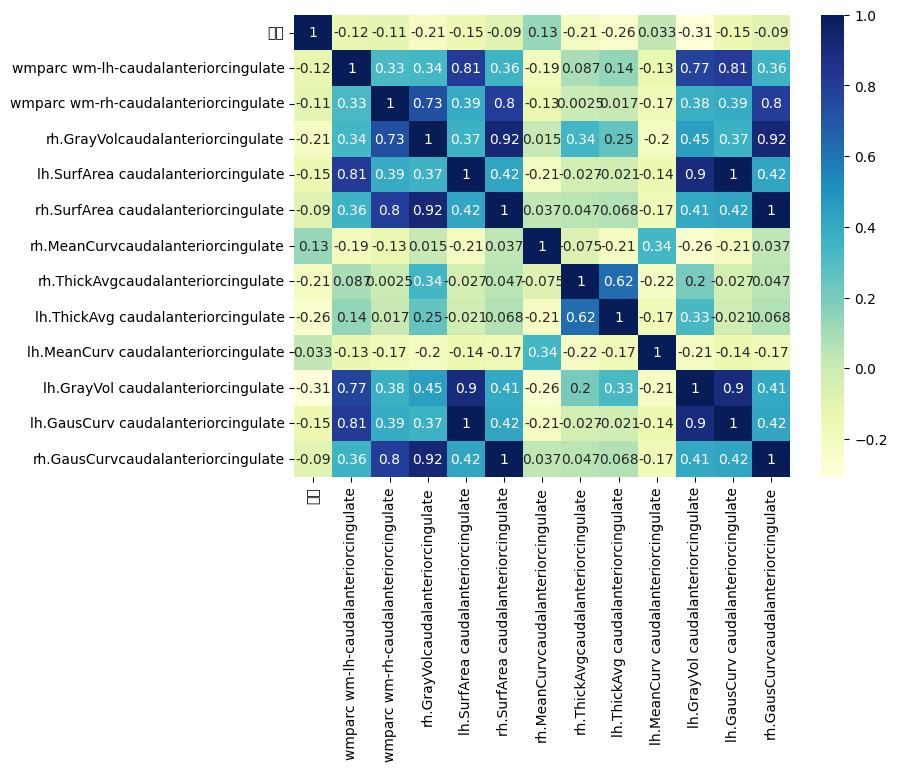

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(sub_df.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
# 将第一列设置为响应变量
response = fulldata.iloc[:, 3]

# 将剩余所有列设置为预测变量（自变量）
predictors = fulldata.iloc[:, 4:]

# 添加截距列
predictors = sm.add_constant(predictors)

# 构建线性回归模型
model = sm.OLS(response, predictors)

# 拟合模型
results = model.fit()
results.summary()

In [90]:
right_skewed,left_skewed = process_columns(fulldata)
right_skewed


['wmparc wm-lh-parahippocampal',
 'wmparc wm-lh-parsorbitalis',
 'wmparc wm-lh-posteriorcingulate',
 'wmparc wm-lh-rostralanteriorcingulate',
 'wmparc wm-lh-frontalpole',
 'wmparc wm-lh-transversetemporal',
 'wmparc wm-rh-entorhinal',
 'wmparc wm-rh-isthmuscingulate',
 'wmparc wm-rh-parahippocampal',
 'wmparc wm-rh-parsorbitalis',
 'wmparc wm-rh-posteriorcingulate',
 'wmparc wm-rh-rostralanteriorcingulate',
 'wmparc wm-rh-frontalpole',
 'wmparc wm-rh-temporalpole',
 'wmparc wm-rh-transversetemporal',
 'wmparc wm-rh-insula',
 'wmparc Left-UnsegmentedWhiteMatter',
 'wmparc Right-UnsegmentedWhiteMatter',
 'rh.GrayVolrostralanteriorcingulate',
 'lh.SurfArea parahippocampal',
 'lh.SurfArea transversetemporal',
 'aseg Left-Cerebellum-White-Matter',
 'aseg CC_Mid_Posterior',
 'rh.SurfArea entorhinal',
 'rh.SurfArea isthmuscingulate',
 'rh.SurfArea medialorbitofrontal',
 'rh.SurfArea rostralanteriorcingulate',
 'rh.MeanCurvcaudalanteriorcingulate',
 'rh.MeanCurvfusiform',
 'rh.MeanCurvinferior

<AxesSubplot:xlabel='wmparc wm-lh-transversetemporal', ylabel='Count'>

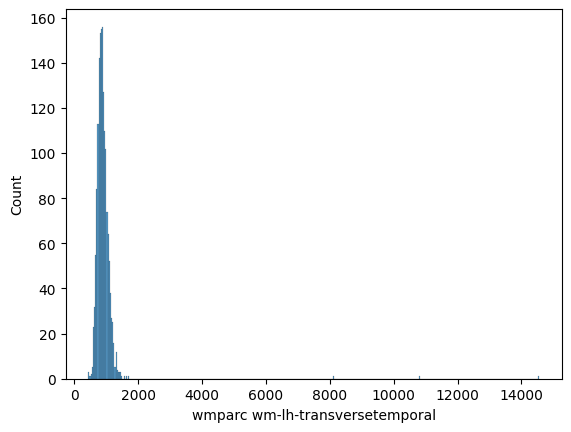

In [92]:
sns.histplot(data=fulldata,x='wmparc wm-lh-transversetemporal')